In [1]:
import SimpleITK as sitk
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import pydicom
from nibabel import orientations as orx

In [10]:
im = sitk.ReadImage('/research/Data/22-001037_SAH_Dataset/14-381-730-Fetch-2024-05-16/CT_14381730_0-120_result')

HDF5-DIAG: Error detected in HDF5 (1.10.4) thread 0:
  #000: /tmp/SimpleITK-build/ITK/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5F.c line 370 in itk_H5Fis_hdf5(): unable open file
    major: File accessibilty
    minor: Not an HDF5 file
  #001: /tmp/SimpleITK-build/ITK/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5Fint.c line 806 in itk_H5F__is_hdf5(): unable to locate file signature
    major: File accessibilty
    minor: Not an HDF5 file
  #002: /tmp/SimpleITK-build/ITK/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5FDint.c line 126 in itk_H5FD_locate_signature(): unable to read file signature
    major: Low-level I/O
    minor: Unable to initialize object
  #003: /tmp/SimpleITK-build/ITK/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5FDint.c line 205 in itk_H5FD_read(): driver read request failed
    major: Virtual File Layer
    minor: Read failed
  #004: /tmp/SimpleITK-build/ITK/Modules/ThirdParty/HDF5/src/itkhdf5/src/H5FDsec2.c line 716 in H5FD_sec2_read(): file read failed: time = Wed Jun 12 2

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:105:
sitk::ERROR: Unable to determine ImageIO reader for "/research/Data/22-001037_SAH_Dataset/14-381-730-Fetch-2024-05-16/CT_14381730_0-120_result"

In [11]:
# get voxel spacing (for 3-D image)
spacing = im.GetSpacing()
spacing_x = spacing[0]
spacing_y = spacing[1]
spacing_z = spacing[2]
# image_nda = sitk.GetArrayFromImage(im)
image_nda = sitk.GetArrayFromImage(im)

In [12]:
label_1=np.sum(image_nda==1)
label_1

99926

In [13]:
label_2=np.sum(image_nda==2)
label_2+label_1

99926

In [14]:
voxel_volume = spacing_x * spacing_y * spacing_z
imageSegm_nda_NonZero = image_nda.nonzero()


In [15]:
imageSegm_nda_NonZero

(array([ 73,  73,  73, ..., 197, 197, 197]),
 array([293, 293, 293, ..., 248, 248, 249]),
 array([261, 262, 263, ..., 184, 185, 185]))

In [16]:
num_voxels = len(list(zip(imageSegm_nda_NonZero[0],imageSegm_nda_NonZero[1], imageSegm_nda_NonZero[2])))
num_voxels

99926

In [2]:
inputDir = '/research/Data/22-001037_SAH_Dataset/14-381-730-Fetch-2024-06-19/nifti_12336770/CT_14381730_0-120_no_skull_SAH_result'

In [3]:
# read image
mean_volume={}
for roots, dirs, files in os.walk(inputDir):
    # for each in tqdm(os.listdir(path0)): 
    for file in files:
        if file.endswith(".nii.gz"):
            volume_object_ml=0
            im = sitk.ReadImage(os.path.join(inputDir, file))

    # get voxel spacing (for 3-D image)
            spacing = im.GetSpacing()
            spacing_x = spacing[0]
            spacing_y = spacing[1]
            spacing_z = spacing[2]
            # image_nda = sitk.GetArrayFromImage(im)
    # determine volume of a single voxel
            voxel_volume = spacing_x * spacing_y * spacing_z
            image_nda = sitk.GetArrayFromImage(im)
            imageSegm_nda_NonZero = image_nda.nonzero()       
            num_voxels = len(list(zip(imageSegm_nda_NonZero[0],imageSegm_nda_NonZero[1], imageSegm_nda_NonZero[2])))
            volume_object_ml = (num_voxels * spacing_x * spacing_y * spacing_z) / 1000
            # print(f'the volume of {file} is {volume_object_ml}')
            mean_volume[file]=volume_object_ml
            print(f"{file}: voxel_volume={voxel_volume}, num_voxels={num_voxels},volume={volume_object_ml}")
            len(mean_volume)
        else:
            continue



12336770_53453954_CT_HEAD_NECK_ANGIOGRAM_WITH_IV_CONTRAST-2024-06-17.nii.gz: voxel_volume=0.2384185791015625, num_voxels=29553,volume=7.045984268188477
12336770_IIMS76000164_CT_BRAIN_W_O_CONTRAST-2024-06-14.nii.gz: voxel_volume=0.5960458656774392, num_voxels=30108,volume=17.94574892381634


In [19]:
mean_volume=dict(sorted(mean_volume.items()))
mean_volume

{'Head_0_75_Hr40_2_3_5_13_120.nii.gz': 14.861430667321496}

In [20]:
import pandas as pd
mean_volume_csv = pd.DataFrame(mean_volume.items(), columns=['filename','volume'])
# print(mean_volume_csv)
# pd.DataFrame(data=mean_volume_csv).to_csv('/research/Data/22-001037_SAH_Dataset/14380450/Nifty_0-120_no_skull_SAH_result.csv', header=True)


In [34]:
mean_volume = {'4-11_day1': 10.742425918579102,
 '4-12_day2': 9.06515121459961,
 '4-13_day3': 5.562782287597656,
 '4-14_day4': 5.339622497558594,
 '4-15_day5': 1.972198486328125,
 '4-17_day7': 1.3570785522460938}

In [21]:
mean_volume = {'Day1': 10.742425918579102,
 'Day2': 9.06515121459961,
 'Day3': 5.562782287597656,
 'Day4': 5.339622497558594,
 'Day5': 1.972198486328125,
 'Day7': 1.3570785522460938}

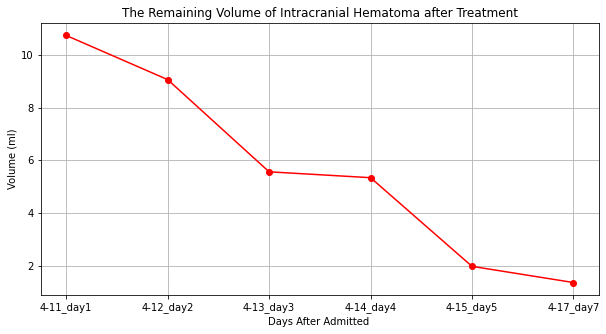

<Figure size 432x288 with 0 Axes>

In [35]:
values = list(mean_volume.values())
days = list(mean_volume.keys())
# Creating the plot
plt.figure(figsize=(10, 5))  # Optional: specifies the size of the figure
plt.plot(days, values, marker='o',color='red')  # Line plot with markers
plt.title('The Remaining Volume of Intracranial Hematoma after Treatment')  # Title of the plot
plt.xlabel('Days After Admitted ')  # X-axis label
plt.ylabel('Volume (ml)')  # Y-axis label
plt.grid(True)  # Optional: adds a grid for easier readability

# Show the plot
plt.show()

# Save the Figure to a file
plt.savefig('/research/Data/22-001037_SAH_Dataset/14380450/Nifty_0-120_no_skull_SAH_result.pdf')

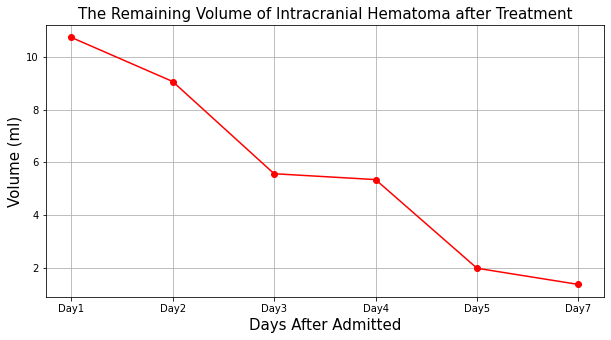

In [30]:
values = list(mean_volume.values())
days = list(mean_volume.keys())
# Creating the plot
plt.figure(figsize=(10, 5))  # Optional: specifies the size of the figure
plt.plot(days, values, marker='o',color='red')  # Line plot with markers
plt.title('The Remaining Volume of Intracranial Hematoma after Treatment',fontsize=15)  # Title of the plot
plt.xlabel('Days After Admitted',fontsize=15)  # X-axis label
plt.ylabel('Volume (ml)',fontsize=15)  # Y-axis label
plt.grid(True)  # Optional: adds a grid for easier readability
# Save the Figure to a file

plt.savefig('/research/Data/22-001037_SAH_Dataset/14380450/Nifty_0-120_no_skull_SAH_result.pdf',format="pdf", bbox_inches="tight")
# Show the plot
plt.show()

